### 闯关作业

1. 上交所网站提供历史的融资融券余额数据，请用爬虫将2018年每日融资余额数据取出并画一张折线图。 

http://www.sse.com.cn/market/othersdata/margin/sum/

#### URL分析

http://query.sse.com.cn/marketdata/tradedata/queryMargin.do?jsonCallBack=jsonpCallback72495&isPagination=true&beginDate=20180211&endDate=20180313&tabType=&stockCode=&pageHelp.pageSize=25&pageHelp.pageNo=1&pageHelp.beginPage=1&pageHelp.cacheSize=1&pageHelp.endPage=5&_=1520933846598

+ jsonCallBack=jsonpCallback72495&
+ isPagination=true&
+ beginDate=20180211&
+ endDate=20180313&
+ tabType=&stockCode=&
+ pageHelp.pageSize=25&
+ pageHelp.pageNo=1&
+ pageHelp.beginPage=1&
+ pageHelp.cacheSize=1&
+ pageHelp.endPage=5&
+ _=1520933846598


### 简化查询条件
try: http://query.sse.com.cn/marketdata/tradedata/queryMargin.do?beginDate=20180211&endDate=20180313&isPagination=false

In [26]:
#import library
import requests
import time

# prepare request data
URL = "http://query.sse.com.cn/marketdata/tradedata/queryMargin.do"
print(URL)
data = {
    "isPagination":"false",
    "beginDate":"20180101",
    "endDate":"20180313",
    "_":str(int(time.time()*1000))
}

# request header
USER_AGENT = "Mozilla/5.0 (Windows NT 6.1; WOW64) " \
             "AppleWebKit/537.36 (KHTML, like Gecko) " \
             "Chrome/57.0.2987.133 Safari/537.36 "

        
# simulate http request
session = requests.Session()
session.headers['User-Agent'] = USER_AGENT
session.headers['Referer'] = 'http://www.sse.com.cn/market/othersdata/margin/sum/'

res = session.get(URL, params=data)
if res.status_code != 200:
    print("query_error, status_code = ", res.status_code)

# display http response
rsp = res.text
print(rsp)    

http://query.sse.com.cn/marketdata/tradedata/queryMargin.do
{"actionErrors":[],"actionMessages":[],"beginDate":"20180101","detailsDate":"","endDate":"20180313","errorMessages":[],"errors":{},"fieldErrors":{},"isPagination":"false","jsonCallBack":null,"locale":"zh_CN","pageHelp":{"beginPage":1,"cacheSize":5,"data":[{"ROWNUM_":null,"opDate":"20180312","rqchl":null,"rqmcl":92955878,"rqyl":499347672,"rqylje":4192577698,"rw":null,"rzche":27151334966,"rzmre":30147045291,"rzrqjyzl":604238433886,"rzye":600045856188,"securityAbbr":null,"stockCode":null},{"ROWNUM_":null,"opDate":"20180309","rqchl":null,"rqmcl":85716362,"rqyl":517673800,"rqylje":4172074169,"rw":null,"rzche":23877804654,"rzmre":22987739737,"rzrqjyzl":601222220032,"rzye":597050145863,"securityAbbr":null,"stockCode":null},{"ROWNUM_":null,"opDate":"20180308","rqchl":null,"rqmcl":80078000,"rqyl":513988371,"rqylje":4143832074,"rw":null,"rzche":18537492344,"rzmre":19508623178,"rzrqjyzl":602084042854,"rzye":597940210780,"securityAbbr":nu

In [28]:
import json

# 载入数据并记录
rsp_json = json.loads(rsp)
raw_records = rsp_json['pageHelp']['data']

list_date = []
list_rzye = []

for record in raw_records:
    list_date.append(record['opDate'])
    list_rzye.append(record['rzye'])
    

In [29]:
# convert int to datetime
import datetime

list_date2 = []

for trade_date in list_date:
    dt_tradedate = datetime.datetime.strptime(str(trade_date), '%Y%m%d')
    list_date2.append(dt_tradedate)

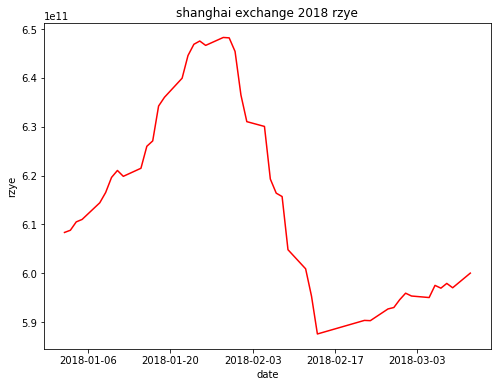

In [31]:
# 导入python画图库matplotlib
import matplotlib.pyplot as plt  

# 设置图片大小
plt.figure(figsize=(8,6))

# 画柱状图
plt.plot(list_date2, list_rzye, color='red')

# 标识标题及坐标轴信息
plt.title('shanghai exchange 2018 rzye')
plt.xlabel('date')
plt.ylabel('rzye')

# 显示画图结果
plt.show()